In [ ]:
!pip install xlrd
!pip install openpyxl

In [ ]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, lfilter

trial = 2
df = pd.read_excel (r'Polyurethane_Clipped_V2.xlsx', sheet_name='T'+str(trial), engine='openpyxl')
print(df)

            t         x         y  ...  Unnamed: 5  Unnamed: 6  Unnamed: 7
0    0.000000  0.046705  0.125044  ...         NaN         NaN         NaN
1    0.033333  0.051193  0.121246  ...         NaN         NaN         NaN
2    0.066667  0.051193  0.120450  ...         NaN         NaN         NaN
3    0.100000  0.055607  0.109557  ...         NaN         NaN         NaN
4    0.133333  0.055825  0.107738  ...         NaN         NaN         NaN
..        ...       ...       ...  ...         ...         ...         ...
215       NaN       NaN       NaN  ...         NaN         NaN         NaN
216       NaN       NaN       NaN  ...         NaN         NaN         NaN
217       NaN       NaN       NaN  ...         NaN         NaN         NaN
218       NaN       NaN       NaN  ...         NaN         NaN         NaN
219       NaN       NaN       NaN  ...         NaN         NaN         NaN

[220 rows x 8 columns]


In [ ]:
t = np.multiply(np.array(df['t']), 0.125)
x = np.array(df['x'])
y = np.array(df['y'])

x_init = float(x[0])
y_init = float(y[0])
x = np.subtract(x, x_init)
y = np.subtract(y, y_init)

# Data filter settings
fs = 240.0      # sample rate, Hz
cutoff = 8.0    # desired cutoff frequency of the filter, Hz, slightly higher than actual 1.2 Hz
nyq = 0.5 * fs  # Nyquist Frequency
order = 2       # sin wave can be approx represented as quadratic

normal_cutoff = cutoff / nyq
b, a = butter(order, normal_cutoff, btype='low', analog=False)
x = lfilter(b, a, x)
y = lfilter(b, a, y)


x = np.add(x, x_init)
y = np.add(y, y_init)

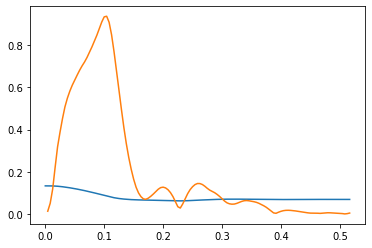

In [ ]:
disp = np.sqrt(np.square(x) + np.square(y))
vel = np.divide(np.sqrt(np.square(x[1:]-x[:-1]) + np.square(y[1:]-y[:-1])), t[1:]-t[:-1])

dmin = float(np.min(disp))
dmint = float(t[np.argmin(disp)])

plt.plot(t, disp)
plt.plot(t[1:], vel)
plt.scatter(dmint, dmin)

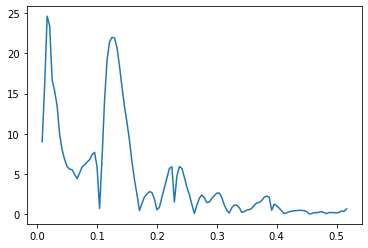

In [ ]:
acc = np.abs(np.divide(vel[1:]-vel[:-1], t[2:]-t[1:-1]))
amax = float(np.max(acc))
amaxt = float(t[2:][np.argmax(acc)])

plt.plot(t[2:], acc)
plt.scatter(amaxt, amax)

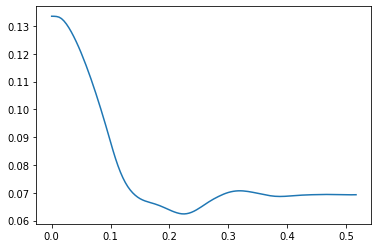

In [ ]:
peaks = []
for i in range(2, len(vel)):
    if np.sign(vel[i] - vel[i-1]) != np.sign(vel[i-1] - vel[i-2]) and t[1:][i] > dmint:
        peaks.append(i-1)

plt.plot(t, disp)
plt.scatter(t[peaks], disp[peaks])

system did not settle
amax: nan
st: nan


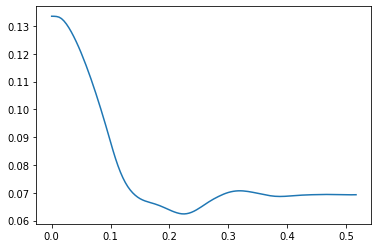

In [ ]:
t1 = amaxt
try:
    t2 = t[peaks[-1]]
    a1 = np.abs(disp[peaks[1]] - disp[peaks[0]])
    a2 = np.abs(disp[peaks[-1]] - disp[peaks[-2]])
    for i in range(2, len(peaks)):
        t2 = t[peaks[i]]
        a2 = np.abs(disp[peaks[i]] - disp[peaks[i-1]])
        if a2 < (0.05 * a1):
            break
    if a2 < (0.05 * a1):
        st = t2 - t1
    else:
        raise IndexError
except IndexError:
    st = t[-1] - t1
    print('system did not settle')

print('amax: ' + str(amax))
print('st: ' + str(st))

plt.plot(t, disp)
plt.scatter(t[peaks], disp[peaks])
plt.vlines([t1, t1+st], np.min(disp), np.max(disp))